In [2]:
import os
from google.colab import files

# 1. Install Kaggle library
!pip install kaggle

# 2. Upload kaggle.json
print("Please upload your kaggle.json file. You can generate it from your Kaggle 'Account' page.")
# This command will open a file selection dialog. Please select your kaggle.json file.
files.upload()

# 3. Set up Kaggle credentials
# Move the uploaded kaggle.json to the correct directory and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 4. Download Titanic competition data
# This downloads the competition dataset. If you need a specific dataset, please provide its identifier.
!kaggle competitions download -c titanic

# 5. Unzip the downloaded data
print("Unzipping titanic.zip...")
!unzip -o titanic.zip

print("Titanic data download and extraction complete.")
print("Available files:")
!ls

Please upload your kaggle.json file. You can generate it from your Kaggle 'Account' page.


Saving kaggle.json to kaggle.json
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 112MB/s]
Unzipping titanic.zip...
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
Titanic data download and extraction complete.
Available files:
gender_submission.csv  sample_data  titanic.zip
kaggle-260222.json     test.csv     train.csv


In [3]:
!pip install dask graphviz

In [4]:
import dask
import dask.dataframe as dd

dask_df =  dd.read_csv("train.csv")

In [5]:
dask_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S


In [6]:
dask_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
npartitions=1,,,,,,,
,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...


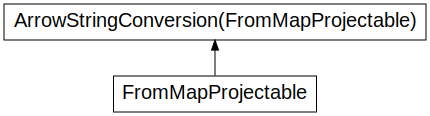

In [7]:
dask_df.visualize()

In [8]:
dask_df = dask_df.compute()
dask_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dask_df.visualize()

AttributeError: 'DataFrame' object has no attribute 'visualize'

In [10]:
import dask
import dask.dataframe as dd

dask.config.set({"dataframe.backend": "cudf"})

In [11]:
dask_df =  dd.read_csv("train.csv")

In [12]:
dask_df.compute().describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### .persist()
- Task Graph의 collection된 결과를 메모리에 유지하는 역할
- .compute()와 .persist()
  - 최종적으로 우리의 파이프라인의 결과를 받기 위해선 .compute()의 호출이 필요. 하지만 .compute()는 모든 연산을 순차적으로 진행한다.
  - 구성한 Task Graph 중 자주 호출되는 연산 혹은 미리 진행해 두면 좋은 작업등이 존재한다면 .persist()를 적절히 잘 사용하여 효과적인 파이프라인 구성 가능

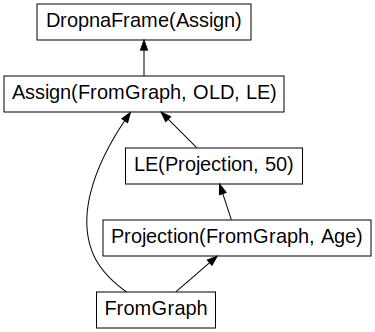

In [15]:
dask_df_new            = dask_df.copy()
dask_df_new            = dask_df_new.persist() # 이게 어디있느냐에 따라서 시각 출력이 다르게 전개됨
dask_df_new['OLD']    = dask_df_new['Age']<=50
dask_df_new            = dask_df_new.dropna()

dask_df_new.visualize()

---



In [8]:
import subprocess
import logging

In [9]:
# Default DASK Libraries and set use GPU's
import dask
import dask_cudf
import dask.dataframe as dd
dask.config.set({"dataframe.backend": "cudf"})

# Set for Multi GPU use
from dask_cuda        import LocalCUDACluster
from dask.distributed import Client, wait, progress

cmd = "hostname --all-ip-addresses"
process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
output, error = process.communicate()
IPADDR = str(output.decode()).split()[0]

cluster = LocalCUDACluster(ip=IPADDR, silence_logs=logging.ERROR)
client = Client(cluster)

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:   tcp://172.28.0.12:42043
INFO:distributed.scheduler:  dashboard at:  http://172.28.0.12:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://172.28.0.12:42643'
INFO:distributed.scheduler:Register worker addr: tcp://172.28.0.12:38721 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://172.28.0.12:38721
INFO:distributed.core:Starting established connection to tcp://172.28.0.12:56030
INFO:distributed.scheduler:Receive client connection: Client-2857d597-106c-11f1-8210-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://172.28.0.12:56040


In [10]:
client

Connection method: Cluster object,Cluster type: dask_cuda.LocalCUDACluster
Dashboard: http://172.28.0.12:8787/status,
Dashboard: http://172.28.0.12:8787/status,Workers: 1
Total threads: 1,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://172.28.0.12:42043,Workers: 0
Dashboard: http://172.28.0.12:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://172.28.0.12:38721,Total threads: 1
Dashboard: http://172.28.0.12:43371/status,Memory: 12.67 GiB
Nanny: tcp://172.28.0.12:42643,


In [11]:
import os
from google.colab import files

# 1) Install Kaggle library
!pip -q install kaggle

# 2) Upload kaggle.json
print("kaggle.json 파일을 업로드하세요 (Kaggle > Account > API > Create New Token).")
files.upload()

# 3) Set up Kaggle credentials
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 4) Download the dataset (NOT competition)
# Kaggle dataset identifier: sgpjesus/bank-account-fraud-dataset-neurips-2022
!kaggle datasets download -d sgpjesus/bank-account-fraud-dataset-neurips-2022 -p /content --force

# 5) Unzip the downloaded data
print("Unzipping dataset zip...")
!unzip -o /content/bank-account-fraud-dataset-neurips-2022.zip -d /content/bank_fraud_data

print("Dataset download and extraction complete.")
print("Available files:")
!ls -lah /content/bank_fraud_data

kaggle.json 파일을 업로드하세요 (Kaggle > Account > API > Create New Token).


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022
License(s): CC-BY-NC-SA-4.0
 90% 479M/532M [00:02<00:00, 139MB/s] 
100% 532M/532M [00:02<00:00, 188MB/s]
Unzipping dataset zip...
Archive:  /content/bank-account-fraud-dataset-neurips-2022.zip
  inflating: /content/bank_fraud_data/Base.csv  
  inflating: /content/bank_fraud_data/Variant I.csv  
  inflating: /content/bank_fraud_data/Variant II.csv  
  inflating: /content/bank_fraud_data/Variant III.csv  
  inflating: /content/bank_fraud_data/Variant IV.csv  
  inflating: /content/bank_fraud_data/Variant V.csv  
Dataset download and extraction complete.
Available files:
total 1.3G
drwxr-xr-x 2 root root 4.0K Feb 23 04:00  .
drwxr-xr-x 1 root root 4.0K Feb 23 04:00  ..
-rw-r--r-- 1 root root 204M Nov 29  2023  Base.csv
-rw-r--r-- 1 root root 204M Nov 29  2023 'Variant I.csv'
-rw-r--r-- 1 root root 204M Nov 29  2023 'Variant II.csv'
-rw-r--r-- 1 root root 241M Nov

In [35]:
usecols = ["fraud_bool",'income', 'name_email_similarity', 'current_address_months_count',
           "bank_months_count", "prev_address_months_count", "velocity_4w",
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'employment_status', 'credit_risk_score', 'email_is_free',
       'housing_status', 'phone_home_valid', 'phone_mobile_valid',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month']
dask_df = dd.read_csv("/content/bank_fraud_data/Variant *.csv", na_values= ['-1'], usecols=usecols)
dask_df = dask_df.persist()

In [36]:
# !pip install dask_ml

In [44]:
from dask_ml.preprocessing import StandardScaler
import cupy as cp

In [38]:
label_col = list(dask_df.select_dtypes(include=["object", "category"]).columns)
scale_col = list(dask_df.select_dtypes(include=["number"]).columns[1:])

In [39]:
for col in label_col:
    dask_df[col] = dask_df[col].astype('category')
    dask_df[col] = dask_df[col].map_partitions(lambda s: s.factorize()[0], meta=('x', 'int32'))

In [40]:
ss = StandardScaler()

In [41]:
X_to_scale = dask_df[scale_col].to_dask_array(lengths=True)
scaled_values = ss.fit_transform(X_to_scale)

dask_df[scale_col] = dd.from_dask_array(scaled_values, columns=scale_col, meta=dask_df[scale_col]._meta)

In [42]:
dask_df = dask_df.drop(["bank_months_count", "prev_address_months_count", "velocity_4w"], axis=1)
dask_df = dask_df.dropna().astype(cp.float32)

train, test = dask_df.random_split([0.8, 0.2])
X_train, y_train = train.drop(["fraud_bool"], axis=1), train["fraud_bool"].astype(cp.int32)
X_test,  y_test  = test.drop(["fraud_bool"], axis=1), test["fraud_bool"].astype(cp.int32)

In [46]:
from cuml.ensemble import RandomForestRegressor as RF

In [47]:
model = RF(n_estimators=100, max_depth=8)
model.fit(X_train, y_train)

ERROR:distributed.core:Exception while handling op shuffle_barrier
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/distributed/core.py", line 834, in _handle_comm
    result = await result
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/distributed/shuffle/_scheduler_plugin.py", line 87, in barrier
    shuffle = self.active_shuffles[id]
              ~~~~~~~~~~~~~~~~~~~~^^^^
KeyError: '909ced43ab5d39ce7e957768fc24cde7'


ValueError: Cannot align indices with non-unique values